In [1]:
import matplotlib.pyplot as plt
from skimage.data import astronaut
from skimage.color import rgb2gray
from skimage.io import imread
from scipy.signal import correlate2d
import numpy as np

cameraman = imread('data/cameraman.jpg')
peppers = imread('data/peppers.png')
astronaut_grayscale = rgb2gray(astronaut())

In [49]:
def correlate2d_slow(image, mask):
    I, J = image.shape
    I_mask, J_mask = mask.shape
    I_out, J_out = I - I_mask + 1, J - J_mask + 1
    result = np.zeros((I_out,J_out))
    for i in range(I_out):
        for j in range(J_out):
            result[i,j] = np.sum(image[i:i + I_mask, j:j + J_mask] * mask)
    return result

def mean_filter(image, mask_dim, use_slow=False):
    a = mask_dim
    mask = np.ones((a,a))/(a*a)
    if use_slow:
        return correlate2d_slow(image, mask)
    else:
        return correlate2d(image, mask, mode='same', boundary='fill')

def gaussian_filter(image, mask_dim, sigma = 1, use_slow=False):
    a = mask_dim
    x = np.linspace(0,a-1,a)
    xx, yy = np.meshgrid(x,x)
    mask = np.exp(-0.5*( (xx-a//2)**2 + (yy-a//2)**2 )/sigma**2 )
    mask /= np.sum(mask)
    if use_slow:
        return correlate2d_slow(image, mask)
    else:
        return correlate2d(image, mask, mode='valid', boundary='wrap')

def duto_blur(image, mask_dim,sigma=1,lamb=0.1, use_slow=False):
    blur = gaussian_filter(image, mask_dim, sigma = sigma, use_slow=use_slow)
    image = gaussian_filter(image, mask_dim, sigma = 10**(-40), use_slow=use_slow)
    return lamb * image + (1-lamb)*blur
    
def median_filter(image, mask_dim):
    def median(a,b):
        window_radius = (mask_dim-1)//2
        relu = lambda x: x if x>0 else 0
        a_m, a_p = relu(a-window_radius), relu(a+window_radius+1)
        b_m, b_p = relu(b-window_radius), relu(b+window_radius+1)
        return np.median(image[a_m:a_p, b_m: b_p])
    I, J = image.shape
    result = np.zeros((I,J))
    for i in range(I):
        for j in range(J):
            result[i,j] = median(i,j)
    return result

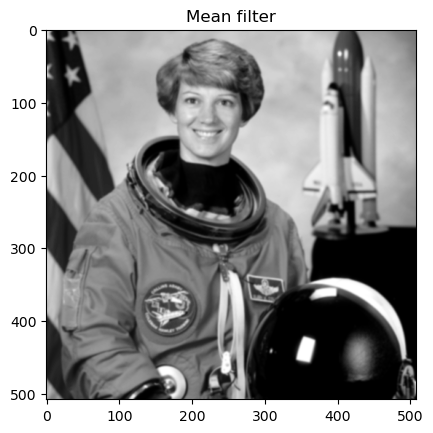

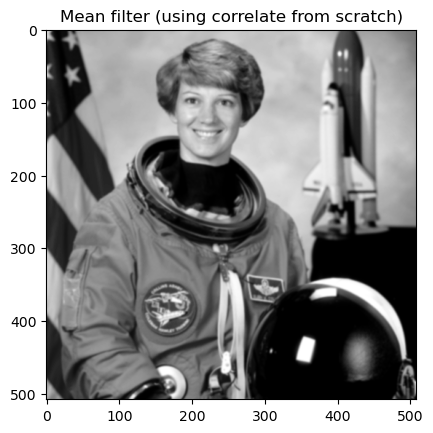

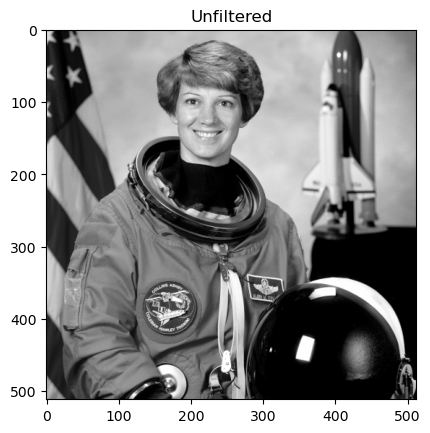

In [44]:
# gaussian

plt.imshow(gaussian_filter(astronaut_grayscale,mask_dim=5), cmap = 'gray' )
plt.title('Gaussian filter')
plt.show()

plt.imshow(gaussian_filter(astronaut_grayscale,mask_dim=5, use_slow=True ), cmap = 'gray' )
plt.title('Gaussian filter (using correlate from scratch)')
plt.show()

plt.imshow(astronaut_grayscale, cmap = 'gray' )
plt.title('Unfiltered')
plt.show()

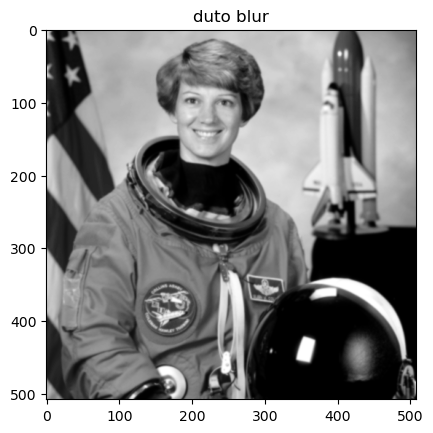

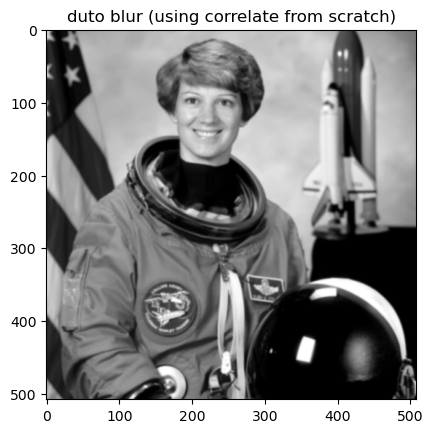

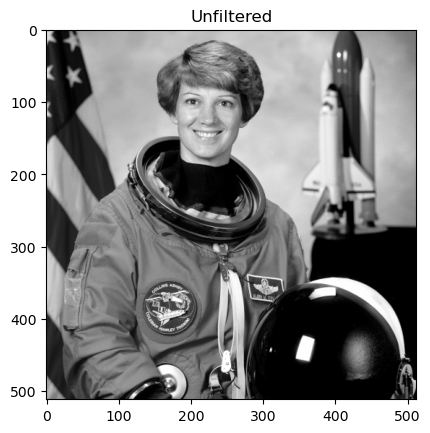

In [51]:
# duto blur
plt.imshow(duto_blur(astronaut_grayscale,mask_dim=5), cmap = 'gray' )
plt.title('duto blur')
plt.show()

plt.imshow(duto_blur(astronaut_grayscale,mask_dim=5, use_slow=True ), cmap = 'gray' )
plt.title('duto blur (using correlate from scratch)')
plt.show()

plt.imshow(astronaut_grayscale, cmap = 'gray' )
plt.title('Unfiltered')
plt.show()

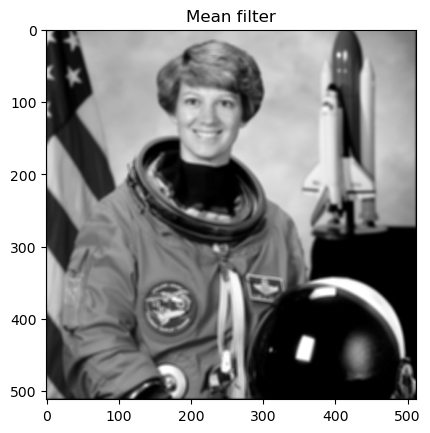

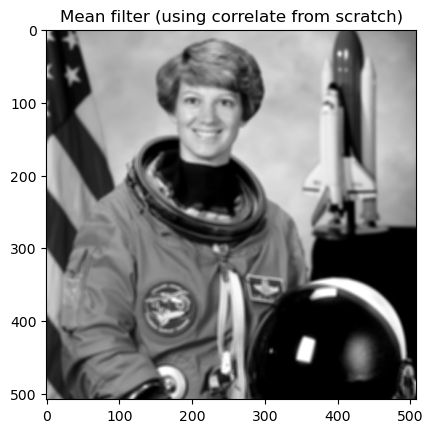

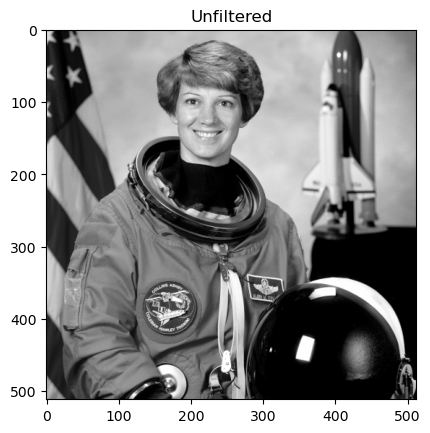

In [43]:
# mean filter

plt.imshow(mean_filter(astronaut_grayscale,mask_dim=5), cmap = 'gray' )
plt.title('Mean filter')
plt.show()

plt.imshow(mean_filter(astronaut_grayscale,mask_dim=5, use_slow=True ), cmap = 'gray' )
plt.title('Mean filter (using correlate from scratch)')
plt.show()

plt.imshow(astronaut_grayscale, cmap = 'gray' )
plt.title('Unfiltered')
plt.show()

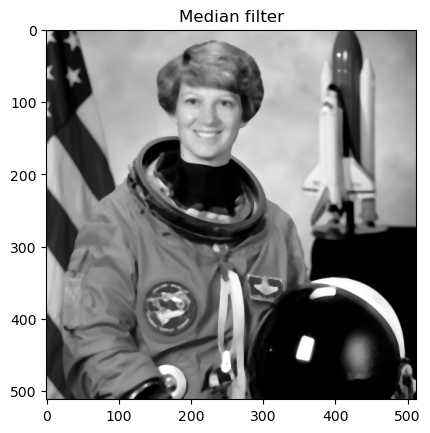

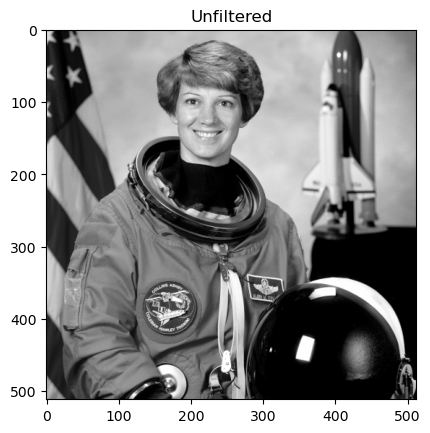

In [52]:
# median
plt.imshow(median_filter(astronaut_grayscale,mask_dim=5 ), cmap = 'gray' )
plt.title('Median filter')
plt.show()

plt.imshow(astronaut_grayscale, cmap = 'gray' )
plt.title('Unfiltered')
plt.show()